# CAR PRICE PREDICTION USING ARTIFICIAL NEURAL NETWORK

In [1]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Importing dataset

In [11]:
df=pd.read_csv('/content/car_purchasing.csv',encoding='ISO-8859-1')

In [6]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [14]:
df.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [17]:
df['country'].unique()

array(['Bulgaria', 'Belize', 'Algeria', 'Cook Islands', 'Brazil',
       'Liberia', 'Syria', 'Czech Republic', 'Armenia', 'Somalia',
       'Sint Maarten', 'Greenland', 'Nicaragua', 'Palestine, State of',
       'United Arab Emirates', 'Gabon', 'Tokelau', 'Portugal', 'Chad',
       'Iraq', 'Sudan', 'Angola', 'Nigeria', 'Madagascar', 'Macedonia',
       'Oman', 'Colombia', 'Namibia', 'Denmark', 'Dominican Republic',
       'Costa Rica', 'Botswana', 'Saint Pierre and Miquelon', 'France',
       'Senegal', 'Cambodia', 'Suriname', 'Turkey', 'Ethiopia',
       'French Guiana', 'Bhutan', 'Georgia', 'Mozambique', 'Nauru',
       'Timor-Leste', 'Djibouti', 'Argentina', 'Taiwan', 'Åland Islands',
       'Turks and Caicos Islands', 'Samoa', 'Vanuatu', 'Mongolia',
       'Sri Lanka', 'Guinea-Bissau', 'Egypt', 'Slovenia', 'Benin',
       'Cape Verde', 'Paraguay', 'Laos', 'Iceland', 'Viet Nam',
       'Marshall Islands', 'Germany', 'Kyrgyzstan', 'Mauritius', 'Gambia',
       'Reunion', 'Jordan', 'S

#Here we must delete 'customer name','customer e-mail','country' and 'gender'.

In [25]:
df.drop(columns=['customer name','customer e-mail','country','gender'],inplace=True)

In [9]:
df.head()

,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


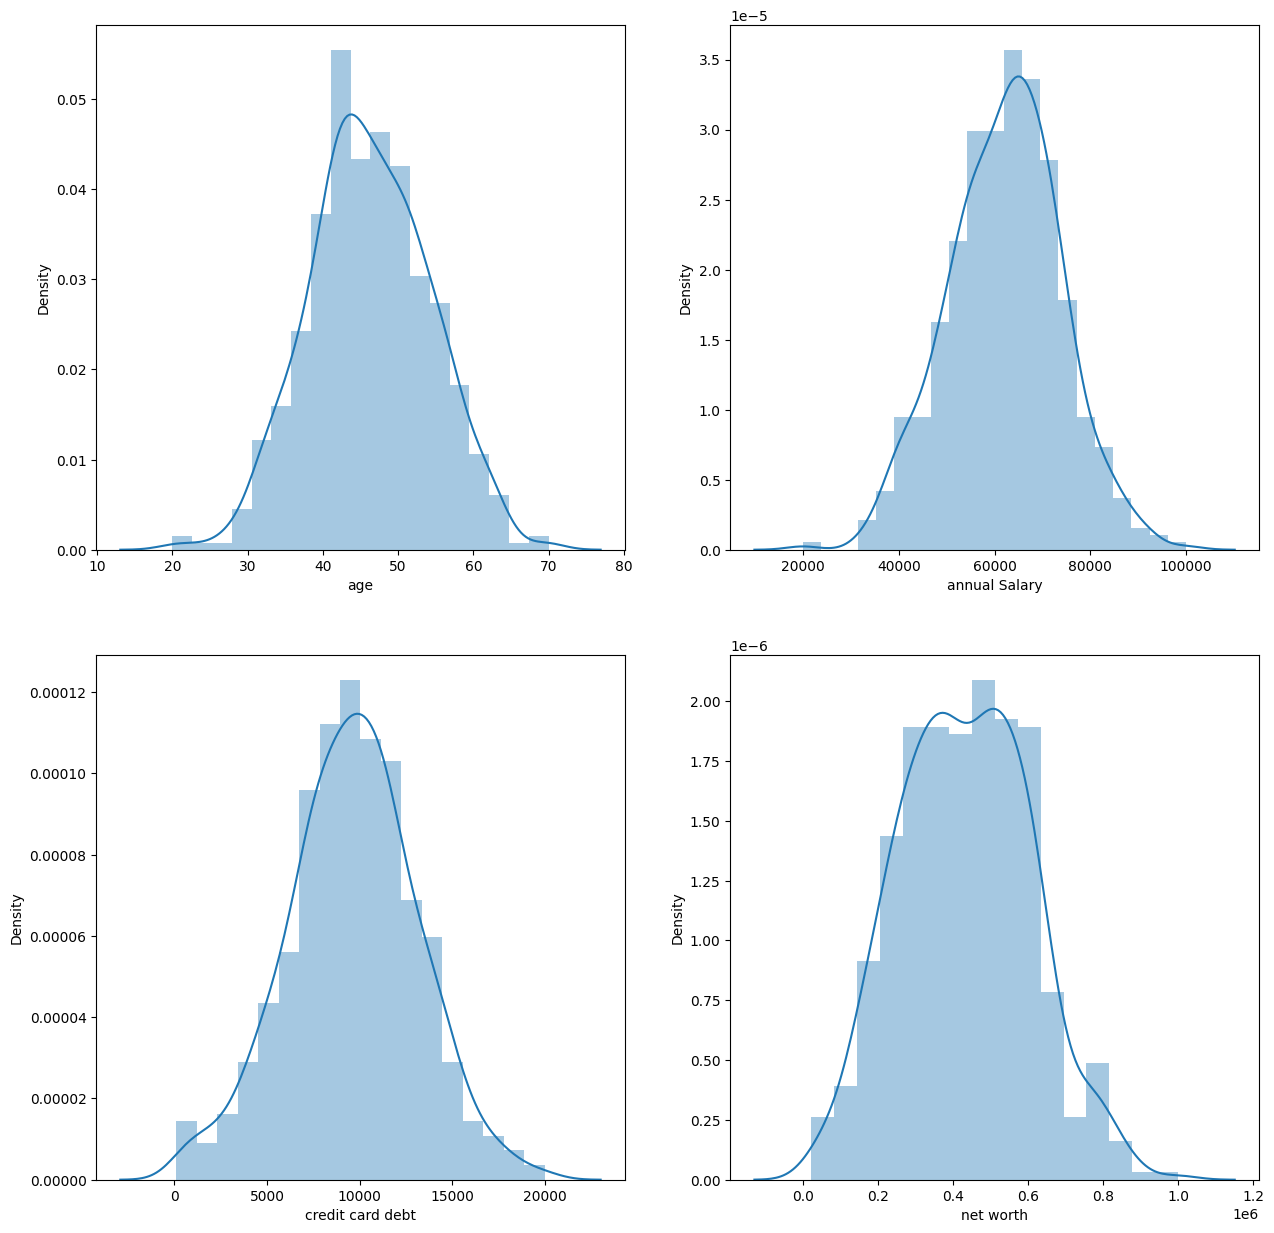

In [20]:
plt.figure(figsize=(15,15))
for i in enumerate(['age','annual Salary','credit card debt','net worth']):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(df[i[1]])

#Separating dataset in independent and dependent variable.

In [26]:
x=df.drop(columns='car purchase amount')
y=df['car purchase amount']

In [27]:
x.head()

,age,annual Salary,credit card debt,net worth
0,41.851720,62812.09301,11609.380910,238961.2505
1,40.870623,66646.89292,9572.957136,530973.9078
2,43.152897,53798.55112,11160.355060,638467.1773
3,58.271369,79370.03798,14426.164850,548599.0524
4,57.313749,59729.15130,5358.712177,560304.0671


In [28]:
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: car purchase amount, Length: 500, dtype: float64

#Pre-Processing dataset

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
y=scaler.fit_transform(y.values.reshape(-1,1))

#Division of data in training and testing set.

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(400, 4)
(400, 1)
(100, 4)
(100, 1)


#Traning ANN Model

In [76]:
model=Sequential()
model.add(Dense(32,activation='relu',input_dim=4))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='linear'))

In [77]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                160       
                                                                 
 dense_19 (Dense)            (None, 10)                330       
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 501 (1.96 KB)
Trainable params: 501 (1.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [78]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [79]:
history=model.fit(x_train,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
10/10 [==============================] - 1s 20ms/step - loss: 0.3125 - val_loss: 0.2719
Epoch 2/50
10/10 [==============================] - 0s 6ms/step - loss: 0.2164 - val_loss: 0.1787
Epoch 3/50
10/10 [==============================] - 0s 5ms/step - loss: 0.1314 - val_loss: 0.0967
Epoch 4/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0653 - val_loss: 0.0448
Epoch 5/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0299 - val_loss: 0.0233
Epoch 6/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0188 - val_loss: 0.0191
Epoch 7/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0169 - val_loss: 0.0176
Epoch 8/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0152 - val_loss: 0.0156
Epoch 9/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0134 - val_loss: 0.0145
Epoch 10/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0121 - val_loss: 0.0131
Epoch 11/50
10/10 

#Predicting model performance

In [80]:
y_pred=model.predict(x_test)

4/4 [==============================] - 0s 3ms/step


In [81]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print("R2 =",R2 )

R2 = 0.991662741884997
